# Practice Case Study Clustering Exercise
###LVC - 3

------------
##Background and Objective
-------------

Various organisation across the world study the socio-economic factors of countries across the world and rate these economies and group together similar ones. These ratings are then used to quickly understand the state of economy and the society and other action items follow.

In this case study, we are provided with the various socio-economic factors of a country. The aim is to cluster countries based on similar socio-economic factors together and study the patterns observed in the clusters.

--------------
##About the data
--------------
The data columns have the following meaning-

- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports - exports in %age of the GDP per capita
- health - total spends on health given as % of gdp
- imports - value of imports given as % of GDP per capita
- income - net income per person
- inflation - inflation rate
- life_expec - avg life expectancy
- total_fer - fertility rate
- gdpp - gdp per capita

In the dataset, we will not do clustering on the gdpp and would rather try to understand the variation of other factors with gdp across the groups that we formed.

----------
##Steps
-----------
1. Read, clean and explore the data
2. Scale the data before clustering
3. Perform Kmeans, KMeoids, DBSCAN on the given dataset and provide insights through visualisations.
4. Summarise the findings





### Import the file and read the dataset

In [5]:
import pandas as pd
df = pd.read_csv('Country-data.csv')
df.shape

(167, 10)

GMM can be used<br>
* does business care about probabilities? use GMM. Not solely based around 100 samples. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Exploring data at hand

In [6]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Comments
 - No Null values, no need to treat missing values
 - All the numerical columns are already numerical. No need to convert datatypes
 - gdpp and country columns also provided. Need to filter these out to perform clustering


In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Insights<br>
* child mortality max is 208 very high
* min life expectancy 32 years very low

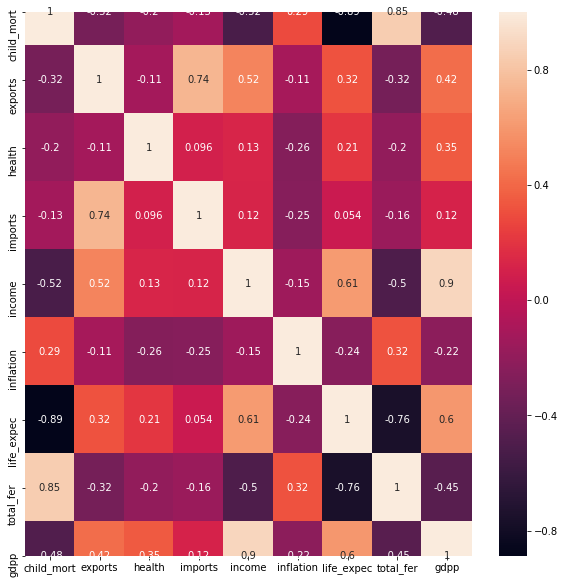

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize  = (10,10))
sns.heatmap(df.corr(),annot = True)

#### Comments
- As expected, the income is highly correlated with gdpp
- Can drop that too before clustering. (Income)

###Scaling the dataset

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
columns = ['child_mort', 'exports', 'health', 'income', 'imports','inflation', 'life_expec', 'total_fer']


In [14]:
df_scaled = pd.DataFrame(ss.fit_transform(df[columns]))

df_scaled.columns = columns
df_scaled.head()

,child_mort,exports,health,income,imports,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.808245,-0.082455,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,-0.375369,0.070837,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.220844,-0.641762,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.585043,-0.165315,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.101732,0.497568,-0.601749,0.704258,-0.541946


In [15]:
df_scaled[columns].describe()

,child_mort,exports,health,income,imports,inflation,life_expec,total_fer
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,-7.512288e-17,2.871954e-16,8.376533e-17,3.616535e-16,3.124580e-16
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-8.603259e-01,-1.939940e+00,-1.137852e+00,-4.337186e+00,-1.191250e+00
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-7.174558e-01,-6.914785e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-3.738080e-01,-1.487432e-01,-2.269504e-01,2.869576e-01,-3.564309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,2.942370e-01,4.913530e-01,2.816364e-01,7.042584e-01,6.175252e-01
max,4.221297e+00,5.813835e+00,4.047436e+00,5.611542e+00,5.266181e+00,9.129718e+00,1.380962e+00,3.009349e+00


## KMeans Clustering

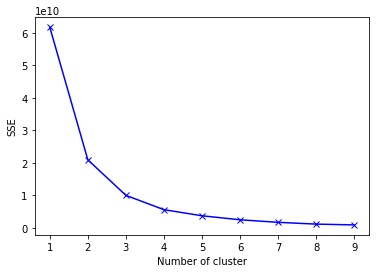

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sc

sse  = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters = k,n_init=10, random_state = 6,max_iter=300 )
  kmeans.fit(df[columns])
  labels = kmeans.predict(df[columns])
#sum of squares to closest cluster center
  sse[k]  = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3,  random_state =6)

kmeans.fit(df_scaled)

df['Kmeans Labels'] = kmeans.predict(df_scaled) #set hard assignment for cluster
df_scaled['Kmeans Labels'] = kmeans.predict(df_scaled)

In [22]:
#cluster data point assignments
df['Kmeans Labels'].value_counts()

1    112
0     52
2      3
Name: Kmeans Labels, dtype: int64

In [ ]:
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


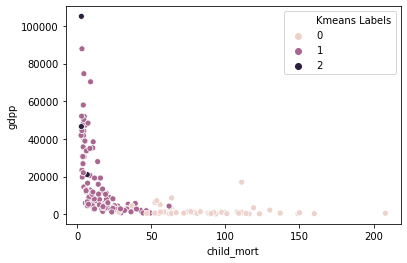

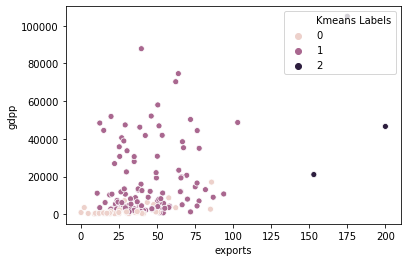

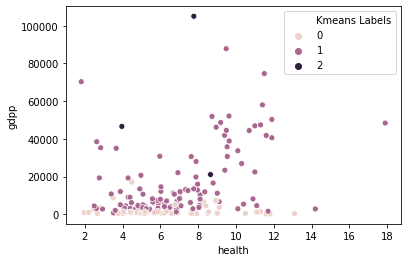

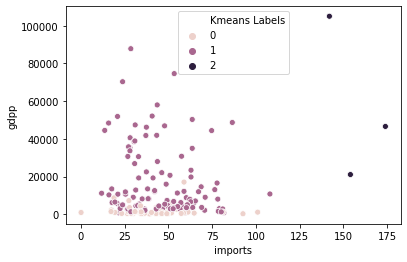

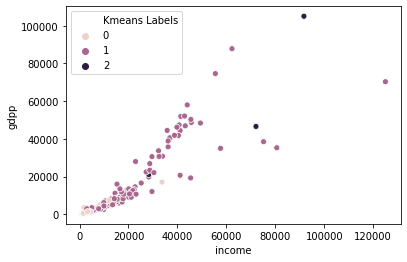

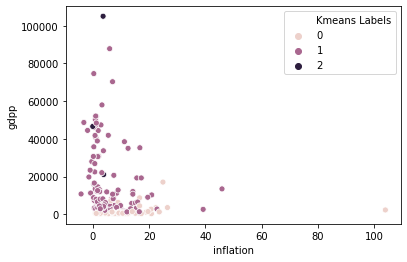

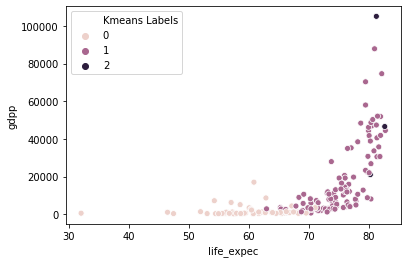

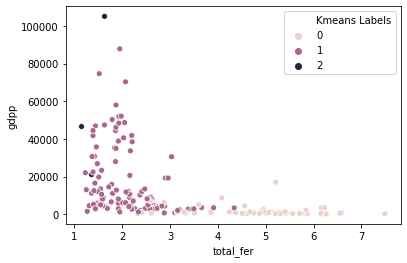

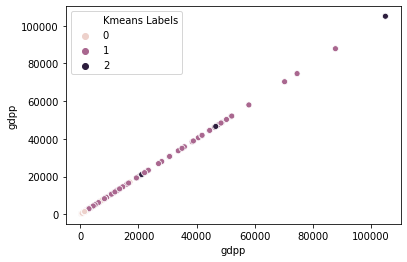

In [23]:
to_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

import matplotlib.pyplot as plt

for i in to_visualise:
  sns.scatterplot(x = i, y = 'gdpp',data = df ,hue='Kmeans Labels')
  plt.show()

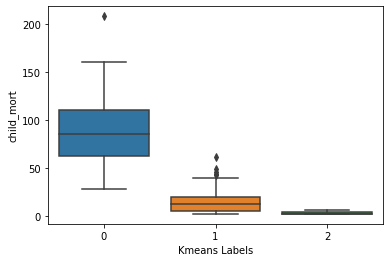

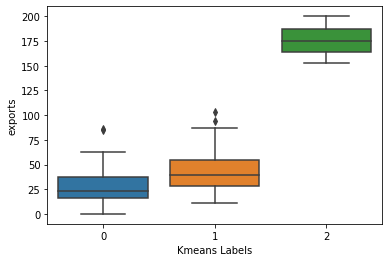

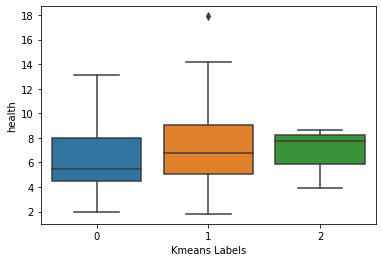

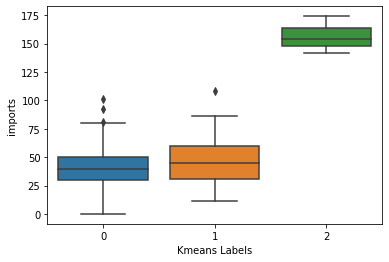

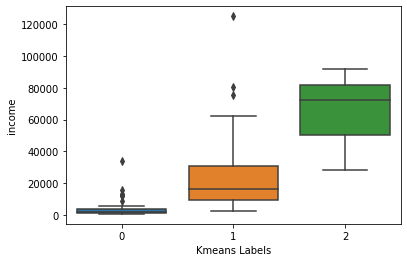

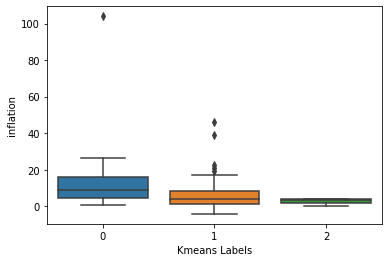

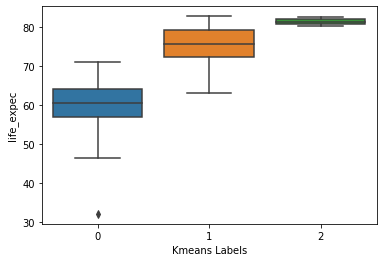

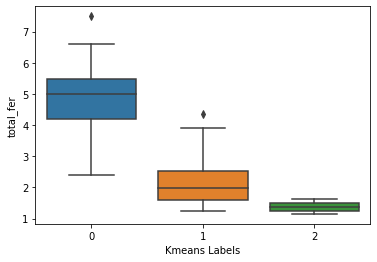

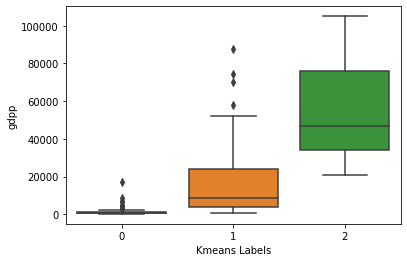

In [24]:
for i in to_visualise:
  sns.boxplot(y = i, data = df,x = 'Kmeans Labels')
  plt.show()

##KMedoids



In [29]:
conda install -c conda-forge scikit-learn-extra

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pytho\Anaconda3

  added / updated specs:
    - scikit-learn-extra


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |   py37hf50a25e_1         3.1 MB  conda-forge
    scikit-learn-extra-0.1.0b2 |   py37hbc2f12b_0         124 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  scikit-learn-extra conda-forge/win-64::scikit-learn-extra-0.1.0b2-py37hbc2f12b_0

The following packages will be UPDATED:

  conda                                4.8.5-py37hc8dfbb8_1 --> 4.9.0-py37hf50a25e_1




conda-4.9.0          | 3.1 MB    |            |   0% 
conda-4.9.0          | 3.1 MB    | 2          |   3% 
conda-4.9.0          | 3.1 MB    | ##

In [30]:
from sklearn_extra.cluster import KMedoids 

In [42]:
kmedo = KMedoids(n_clusters = 3)
kmedo.fit(df_scaled[columns])

df['kmedoLabels'] = kmedo.predict(df_scaled[columns])
df_scaled['kmedoLabels'] = kmedo.predict(df_scaled[columns])

In [43]:
df.kmedoLabels.value_counts()

1    75
2    58
0    34
Name: kmedoLabels, dtype: int64

Not necessarily better for outliers. Clusters are different than for kmeans. 

In [39]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans Labels,kmedoLabels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1


#### We get more even clusters with the PAM. Why? Is presence of outliers in the data a reason?
Explore the same using the below code to remove outliers in the data. If you were to run the K-means again after removal of outliers, would the cluster distribution change?



Outlier detection and removal. 

In [ ]:
# def outlier_detect(data1):
#     for i in data1.describe().columns:
#         Q1=data1.describe().at['25%',i]
#         Q3=data1.describe().at['75%',i]
#         IQR=Q3 - Q1
#         LTV=Q1 - 1.5 * IQR
#         UTV=Q3 + 1.5 * IQR
#         x=np.array(data1[i])
#         p=[]
#         for j in x:
#             if j < LTV or j>UTV:
#                 p.append(data1[i].mean())
#             else:
#                 p.append(j)
#         data1[i]=p
#     return data1

Can use plotly to create animated interactive plots!

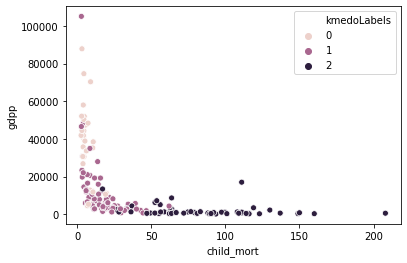

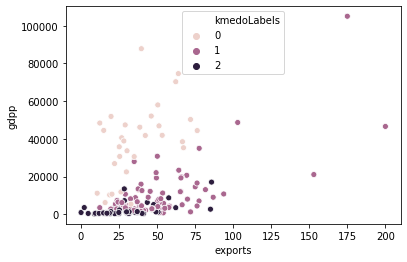

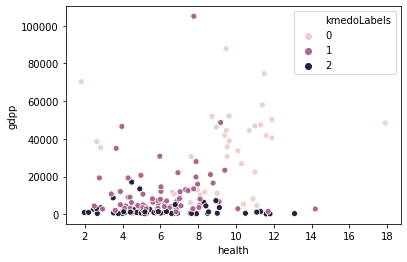

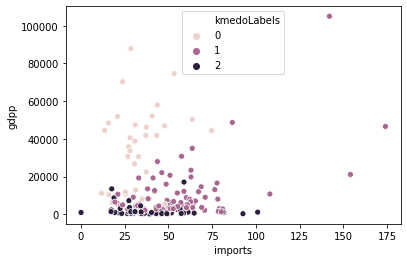

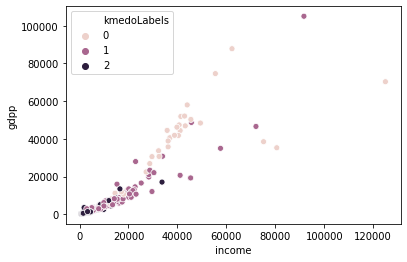

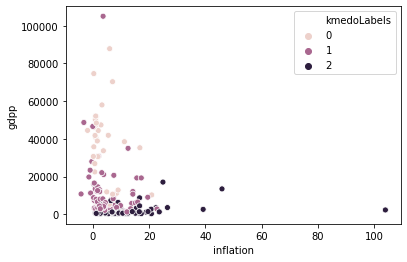

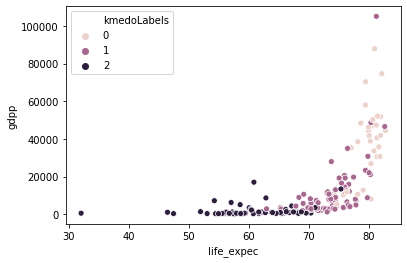

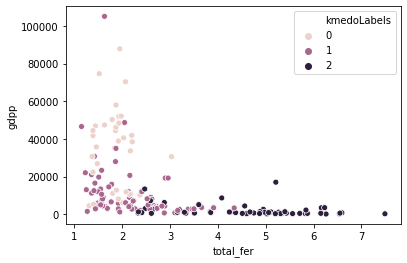

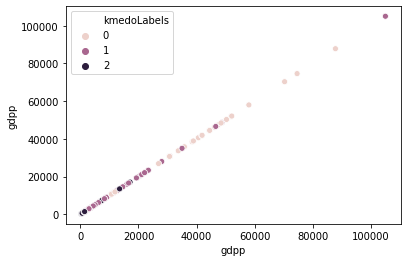

In [40]:
to_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

import matplotlib.pyplot as plt

for i in to_visualise:
  sns.scatterplot(x = i, y = 'gdpp',data = df ,hue='kmedoLabels')
  plt.show()

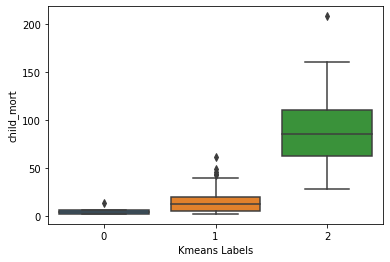

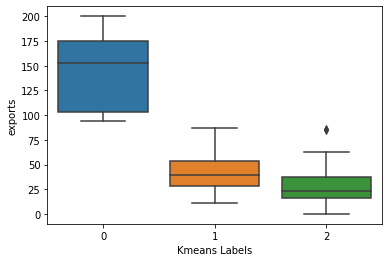

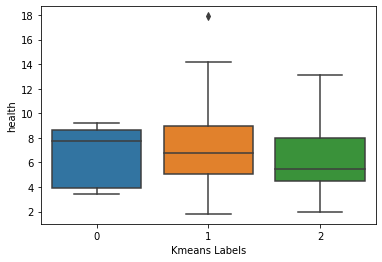

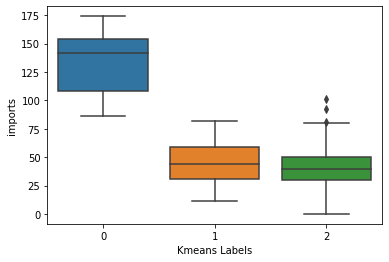

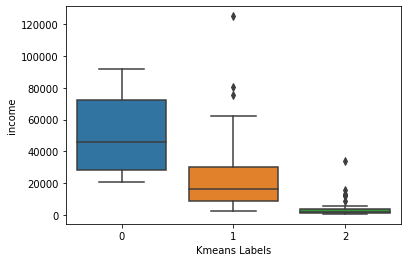

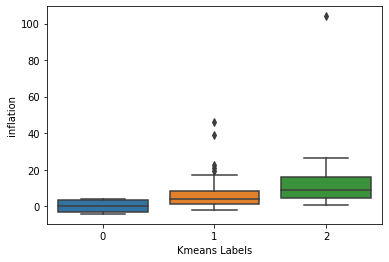

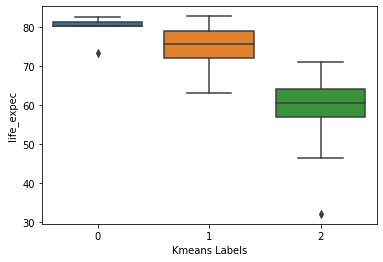

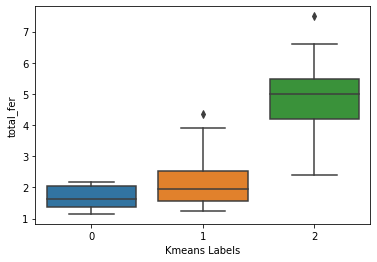

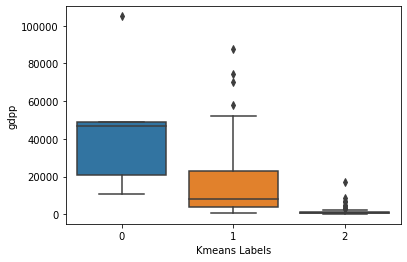

In [ ]:
for i in to_visualise:
  sns.boxplot(y = i, data = df,x = 'Kmeans Labels')
  plt.show()

In [47]:
centers = pd.DataFrame(kmedo.cluster_centers_)
centers.columns = columns
centers.T

,0,1,2
child_mort,-0.822475,-0.519052,0.906037
exports,-0.472340,0.343618,-0.424773
health,1.031297,-0.221167,-0.582666
income,0.991418,-0.350916,-0.732804
imports,-0.666620,0.348419,-0.041025
inflation,-0.589413,-0.375921,0.836717
life_expec,1.099002,0.715537,-0.942388
total_fer,-0.681083,-0.535321,0.875922


In [50]:
df_scaled.head(3)

,child_mort,exports,health,income,imports,inflation,life_expec,total_fer,Kmeans Labels,kmedoLabels
0,1.291532,-1.138280,0.279088,-0.808245,-0.082455,0.157336,-1.619092,1.902882,0,2
1,-0.538949,-0.479658,-0.097016,-0.375369,0.070837,-0.312347,0.647866,-0.859973,1,1
2,-0.272833,-0.099122,-0.966073,-0.220844,-0.641762,0.789274,0.670423,-0.038404,1,1


In [52]:
centers.T[0] #first column in data frame

child_mort   -0.822475
exports      -0.472340
health        1.031297
income        0.991418
imports      -0.666620
inflation    -0.589413
life_expec    1.099002
total_fer    -0.681083
Name: 0, dtype: float64

In [55]:
(df_scaled[columns] - centers.T[0]).sum(axis=1)

0      0.092981
1     -1.834395
2     -0.669127
3      3.030944
4     -0.551783
         ...   
162   -1.960175
163    1.025983
164    1.634191
165    0.675713
166   -0.525195
Length: 167, dtype: float64

In [54]:
(df_scaled[columns] - centers.T[0]).head(1)

,child_mort,exports,health,income,imports,inflation,life_expec,total_fer
0,2.114007,-0.665939,-0.752209,-1.799663,0.584165,0.74675,-2.718094,2.583965


In [57]:
df[(df_scaled[columns] - centers.T[0]).sum(axis=1).abs()==0.0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans Labels,kmedoLabels
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.57,80.3,1.92,38900,1,0


In [58]:
df[(df_scaled[columns] - centers.T[2]).sum(axis=1).abs() == 0.0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans Labels,kmedoLabels
59,Ghana,74.7,29.5,5.22,45.9,3060,16.6,62.2,4.27,1310,0,2


Found Cluster center that matches zero. Found another that matches center 1. 

### Cluster profiles 

- Cluster 0 - Developed countries with low child mortality, high exports and imports with high per capita income and low inflation. The fertility rates are lower and these countries have a high ligh expectancy.
- Cluster 1 - Developing countries with moderate values of the features at hand. The health expenditure range of the cluster is very high.
- Cluster 2 - Underdeveloped countries(small gdpp) with high child mortality rate and fertility.The life expectancy is low and so are imports and exports. The inflation rates are higher as compared to the other clusters. 

## DBSCAN based clusters

In [68]:
columns

['child_mort',
 'exports',
 'health',
 'income',
 'imports',
 'inflation',
 'life_expec',
 'total_fer']

In [69]:
from sklearn.cluster import DBSCAN

scc = {}
dbs = DBSCAN(eps = 1000, min_samples=9)
l = dbs.fit_predict(df[columns])

l

array([ 0,  0, -1,  0, -1, -1,  0, -1, -1,  1, -1, -1,  0,  1,  1, -1,  0,
        0,  0,  0,  0, -1,  1, -1,  1,  0,  0,  0,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,
       -1,  0, -1, -1,  1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0,  0, -1,  0,  0,
       -1,  1,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0,  1,  0,
        0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1,  0,  1,  0,
        0,  0, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  0, -1, -1, -1,
        0, -1, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0, -1, -1, -1,  1,  0,  0,  1,  0,  0,  0],
      dtype=int64)

In [70]:
df['DBS Labels'] = l
df_scaled['DBS Labels'] = l

In [71]:
df['DBS Labels'].value_counts()

 0    90
-1    66
 1    11
Name: DBS Labels, dtype: int64

-1 is an outlier group

#### Comments
- The eps value has been set up for a distance of 1000 and a min sample of 5. Note that we had no intuition behind what should be the value of eps and that is what makes the implementation difficult here.
- Given the issue with selection of hyperparameters here, the technique is not very intuitive and might not be the preferred choice in some cases.


Can optimize silhouette score

https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html#sklearn_extra.cluster.KMedoids